# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

26


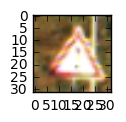

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

%matplotlib inline

#Print any random image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])



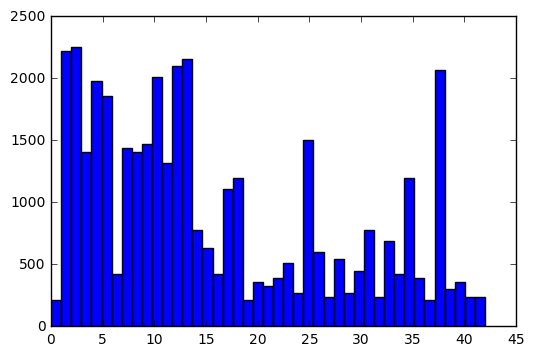

In [4]:
# histogram of labels count
histogram, bins = np.histogram(y_train, bins=n_classes)
width =  (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, histogram, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data
### Step1: Convert to grayscale
### Reasons:
### a. Color increases complexity of model, like it acts signal to noise and increase code complexity
### b. Less training time

# Average (divide each by 3 and add them) of the R,G,B channels (which occupy axis 3) across the images. 
# COPIED BELOW CODE from Stackoverflow. Not smart enough to figure this out ;)
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

X_train = X_train_gry
X_test = X_test_gry



In [6]:
### Preprocess the data
### Step2: Normalize the train and test datasets to range (-1,1)
### TODO: try this: [ y = (ymax-ymin) * (x-xmin) / (xmax-xmin) + ymin ] later
X_train_normalized = (X_train - 127)/128 
X_test_normalized = (X_test - 127)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))

-0.346366778547
-0.350402653428


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_
Step1: Convert to grayscale
    Reasons:
    a. Color increases complexity of model, like it acts signal to noise and increase code complexity
    b. Less training time
Step2: Normalize the train and test datasets to range (-1,1) as described in normalization intro lessons

**Answer:**

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [8]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
from sklearn.model_selection import train_test_split

## Number of adjustable params = 42. validation test size = 1/sqrt(42)
## Source: http://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.152, random_state=0)
print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

Old X_train size: 39209
New X_train size: 33249
X_validation size: 5960


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I created validation set out of the training set. I used 15% of the testing set to create the validation set.

**Logic:**
I have 43 adjustable parameters, the square root of 43 is ~6.55, the fraction should be 1/6.55 or 0.152. Roughly 15% should is reserved for validation and 85% for training.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

### Architecture
Following the link given I used Sermanet/LeCun architecture with few modifications. Also the filters are similar to LeNet architecture which was part of lab. I added one more extra Fully connected layer instead of directly converting 800 to 43(labels)

**Layer 1: Convolutional.** 5x5 convolution. 32x32x1 -> 28x28x6 <br />
**Activation.** ReLu <br />
**Pooling.** 2x2 Pooling which converts 28x28x6 -> 14x14x6 <br />


**Layer 2: Convolutional.** 5x5 convolution. 14x14x6 -> 10x10x16 <br />
**Activation.** ReLu <br />
**Pooling.** 2x2 Pooling which converts 10x10x16 -> 5x5x16 <br />


**Layer 3: Convolutional.** 5x5 convolution. 5x5x16 -> 1x1x400 <br />
**Activation.** ReLu <br />


**Concatenation.** Flatten Concatenate Layer2 and Layer3 output. output 800 <br />

**Dropout.** Dropout with dropout rate of 0.5 <br />

**FC Layer 1: Fully connected.** 800 (input) -> 240 (output) <br />
**Activation.** ReLu <br />

**Dropout.** Dropout with dropout rate of 0.5 <br />

**FC Layer 2: Fully connected.** 240 (input) -> 43 (output) <br />
**return logits (of FC Layer output)** <br />


**Answer:**

In [9]:
import tensorflow as tf

EPOCHS = 45
BATCH_SIZE = 128

mu = 0
sigma = 0.1
       
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(shape=(240, 43), mean = mu, stddev = sigma))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([6])),
    'bc2': tf.Variable(tf.random_normal([16])),
    'bc3': tf.Variable(tf.random_normal([400])),
    'bd1': tf.Variable(tf.random_normal([240])),
    'out': tf.Variable(tf.random_normal([43]))
}

In [10]:

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x): 
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Activation
    conv2 = tf.nn.relu(conv2)
    # Pooling Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)
    
    #Flatten. Input = 5x5x16. Output = 400.
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Activation
    conv3 = tf.nn.relu(conv3)
    
    # Concatenation: Concatenate Layer2 output 5x5x6(flatten it) and Layer3 output. output 800.
    conv2 = flatten(conv2)
    conv3 = flatten(conv3)
    conv_concat = tf.concat_v2([conv2, conv3], 1)
    
    # Dropout
    conv_concat = tf.nn.dropout(conv_concat, keep_prob)

    # FC Layer 1: Fully Connected. Input = 800. Output = 240.
    fc1 = tf.add(tf.matmul(conv_concat, weights['wd1']), biases['bd1'])
    #Activation
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # FC Layer 2: Fully Connected. Input = 240. Output = 43.
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return logits
    

In [12]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#TODO: Do something with keep_prob
keep_prob = tf.placeholder(tf.float32) 

In [14]:
###Training Pipeline###

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
### Model Evaluation ###

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [18]:
### Train the Model ###

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.441

EPOCH 2 ...
Validation Accuracy = 0.789

EPOCH 3 ...
Validation Accuracy = 0.887

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.948

EPOCH 6 ...
Validation Accuracy = 0.961

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.970

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.986

EPOCH 15 ...
Validation Accuracy = 0.986

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.988

EPOCH 19 ...
Validation Accuracy = 0.989

EPOCH 20 ...
Validation Accuracy = 0.986

EPOCH 21 ...
Validation Accuracy = 0.991

EPOCH 22 ...
Validation Accuracy = 0.990

EPOCH 23 ...
Validation Accuracy = 0.989

EPOCH 24 ...
Validation Accura

In [20]:
# Now (drumroll) evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))   

Test Set Accuracy = 0.949


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Parameters for training model are almost similar to LeNet lab. Following are details:

. mu = 0 <br />
. sigma = 0.1 <br />
. batch size = 128 (power of 2) <br />
. epochs = 45 <br />
. learning rate = 0.001 <br />
. dropout rate = 0.5 <br />
. train size = 84.8% <br />
. validation size = 15.2% (1/SQRT(43)) <br />

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with Sermanet/LeCun model and had initial validation accuracy of ~96%. Lot of inputs are taken directly from class room exercies and LeNet lab. On top of Sermanet/LeCun model I made few changes which worked well. Following are learning and changes: <br />

1. Validation size of 80:20(generally recommended) or 90:10 did not work well. Using (1/SQRT(43)) yeilded better results. 80:20 is just benchmark and will hold true most of the times with bigger datasets. Some trail and error to validate the theory. <br />
2. No of epochs. I tried with epochs ranging from 20-60 with different learning rates and validation test sizes. Higher epochs did not improve accuracy. Settled with 45 <br />
3. Adapting Sermanet/LeCun model I added two Fully connected layers in the end. One which converts from 800 to 240 and from 240 to 43 (final number of labels). Second FC layer only added minor improvement of ~0.2% but why not take it. <br />
4. Dropouts. Did few trail and errors by adding and removing Dropouts. Also, some trail and error on dropout rates ranging from 0.4-0.7 but settled for 0.5. Adding dropouts before two FC layers improved accuracy by ~0.6% which was good. <br />

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(7, 32, 32, 1)


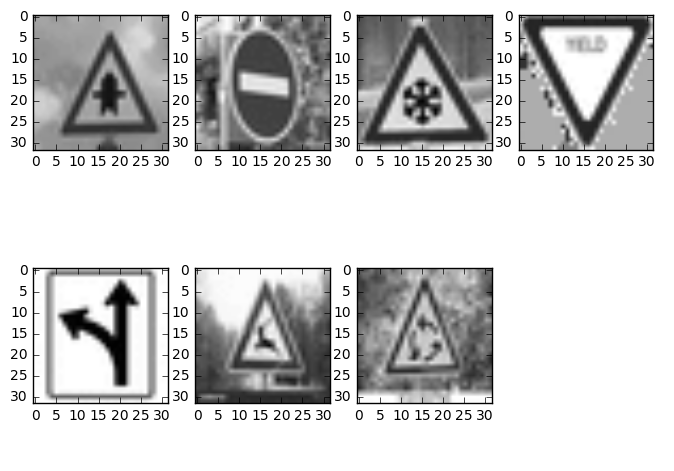

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed

import cv2
import glob
import matplotlib.image as mpimg

candidate_images = []
candidate_labels = [11, 17, 30, 13, 37, 31, 40]

figure, axis = plt.subplots(2,4, figsize=(8, 6))
axis = axis.ravel()

for index, img in enumerate(glob.glob("./random-downloaded-traffic-signs/rsz*.png")):
    image = cv2.imread(img)
    plt.axis("off")
    axis[index].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    cv2.GaussianBlur(image, (5, 5), 0)
    candidate_images.append(image)
    
candidate_images = np.asarray(candidate_images)
images_gray = np.sum(candidate_images/3, axis=3, keepdims=True)
candidate_images = (images_gray - 127)/128 

print(candidate_images.shape) 


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

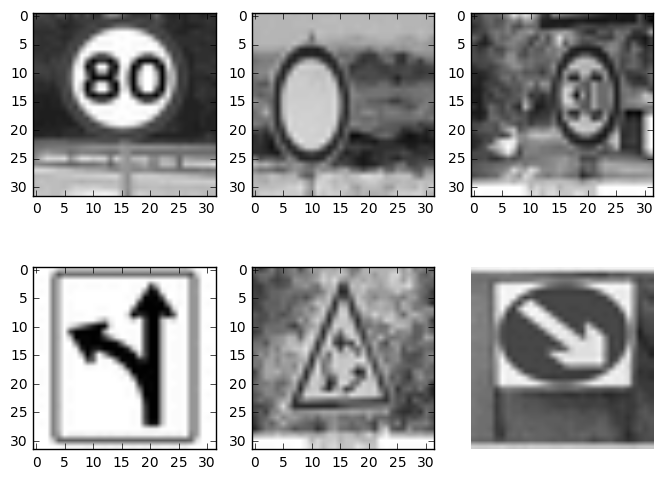

In [27]:
### Five candidate images of traffic signs which are downloaded from internet

candidate_images_difficult = []

figure, axis = plt.subplots(2,3, figsize=(8, 6))
axis = axis.ravel()

for index,img in enumerate(glob.glob("./random-downloaded-traffic-signs1/rsz*.png")):
    image_difficult = cv2.imread(img)
    plt.axis("off")
    axis[index].imshow(cv2.cvtColor(image_difficult, cv2.COLOR_BGR2RGB))
    

In [31]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    candidate_image_accuracy = evaluate(candidate_images, candidate_labels)
    print("Test Set Accuracy on cadidate images = {:.3f}".format(candidate_image_accuracy))
    

Test Set Accuracy on cadidate images = 0.714


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Some of the images I captured were image plain background, clear traffic sign covering entire image with good angle. Accuracy on these images was close to 100%. <br />
To test model I replaced images with less clarity and with lot of background noise (tree, mountains etc) and traffic sign width in image. Noisy images are plotted above. Doing this reduced the accuracy to 71.4%.

**Solution to improve accuracy:**
To improve the accuracy of the model data augmentation should be implemented on training data. Several classes in the data have fewer examples(graph plotted on the top) which resulted in bias.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [38]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

print(top_k)
    

TopKV2(values=<tf.Tensor 'TopKV2_6:0' shape=(?, 5) dtype=float32>, indices=<tf.Tensor 'TopKV2_6:1' shape=(?, 5) dtype=int32>)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.